In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt                                     #visualisation
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer          #convert text data to tf-idf vector
from sklearn.preprocessing import StandardScaler                    #data preprocessing - feature scaling
from collections import Counter                                     #counting occurrences in a list or array
from imblearn.over_sampling import BorderlineSMOTE                  #oversampling technique for imbalanced datasets
from sklearn.manifold import TSNE                                   #dimensionality reduction
import seaborn as sns                                               #visualisation
from sklearn.metrics import log_loss, confusion_matrix              #model evaluation
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV              # probability calibration
from sklearn.metrics import accuracy_score
import pickle                                                       #serializing and deserializing Python objects
import xgboost as xgb                                               #gradient boosting
from sklearn.ensemble import RandomForestClassifier                 #ensemble learning method
from prettytable import PrettyTable                                 #displaying tabular data in a visually appealing way
import spacy                                                        #natural language processing library
spacy.cli.download('en_core_web_lg')
from tqdm.notebook import tqdm                                      # display progress bars

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [6]:
true_label = pd.read_csv('True.csv')
fake_label = pd.read_csv('Fake.csv')
true_label['label'] = 1
fake_label['label'] = 0

data = pd.concat([true_label, fake_label], axis=0, ignore_index= True)

In [4]:
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
data.tail()

,title,text,subject,date,label
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [6]:
data.drop(columns=['title', 'subject', 'date'], inplace=True)

In [7]:
data.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(data, data.label, stratify=data.label, random_state=42, test_size=0.2)


In [9]:
q = "Some Value"
q = str(q).lower().strip()

In [10]:
q = q.replace('%', ' percent')
q = q.replace('$', ' dollar ')
q = q.replace('₹', ' rupee ')
q = q.replace('€', ' euro ')
q = q.replace('@', ' at ')

In [11]:
q = q.replace(',000,000,000 ', 'b ') 
q = q.replace(',000,000 ', 'm ')
q = q.replace(',000 ', 'k ')
q = re.sub(r'([0-9]+)000000000', r'\1b', q)
q = re.sub(r'([0-9]+)000000', r'\1m', q)
q = re.sub(r'([0-9]+)000', r'\1k', q)

In [12]:
q = BeautifulSoup(q).get_text()                 #remove HTML tags and keep only the plain text for further processing or analysis

In [ ]:
#replace any non-alphanumeric characters in the string q with a space, and then it trims any leading or trailing whitespaces from the resulting string
pattern = re.compile('\W')
q = re.sub(pattern, ' ', q).strip()

In [14]:
q = q.split()

In [16]:
q

['some', 'value']

In [17]:
#leveraging the NLTK library to filter out common English stopwords from a list of words (q)
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
q = [word for word in q if word not in stop_words]

In [18]:
q

['value']

In [19]:
#performing stemming on a list of words (q) using the Porter Stemmer from NLTK. The stemmed words are then joined into a single string. 
from nltk.stem import PorterStemmer     #stemming words
stemmer = PorterStemmer()
q_stemmed = [stemmer.stem(word) for word in q]
q_stemmed = ' '.join([word for word in q_stemmed])

In [20]:
q

['value']

In [21]:
print(train_data.columns)

Index(['text', 'label'], dtype='object')


In [22]:
true_data = train_data[train_data['label']==1]

In [23]:
true_data

,text,label
14164,PARIS (Reuters) - French bank Societe Generale...,1
6909,"WINSTON-SALEM, N.C. (Reuters) - North Carolina...",1
1903,(Reuters) - New York and Washington state on M...,1
9141,"ORLANDO, Fla. (Reuters) - Orlando nightclub ki...",1
20957,MADRID (Reuters) - Spain is pushing for the Eu...,1
...,...,...
4360,"PALM BEACH, Fla. (Reuters) - Chinese President...",1
12144,MEXICO CITY (Reuters) - Human rights activist ...,1
11102,WASHINGTON (Reuters) - U.S. President Barack O...,1
3110,WASHINGTON (Reuters) - U.S. President Donald T...,1


In [24]:
true_data = train_data[train_data['label']==1]
fake_data = train_data[train_data['label']==0]

# Flattening to get 1D array
true = np.array([true_data['text']]).flatten()
fake = np.array([fake_data['text']]).flatten()

# Converting into one single string for word cloud
true_str = ' '.join(true)
fake_str = ' '.join(fake)

# Creating stopwords set, we use the same set we did while preprocessing
# Technically, this shouldnt change anything as we have already filtered the sentences
stop_words = set(stopwords.words('english'))

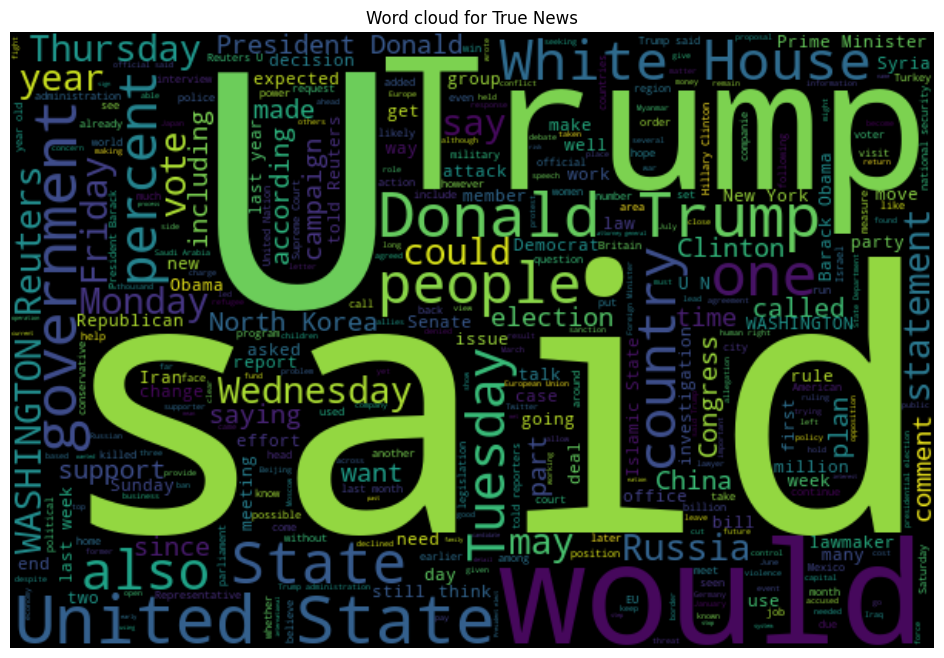

In [25]:
word_cloud = WordCloud(background_color='black', max_words=len(true_str), stopwords=stop_words, width=600, height=400)
word_cloud.generate(true_str)

# print('Word cloud for True News')
plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Word cloud for True News')

plt.axis('off')

plt.show()

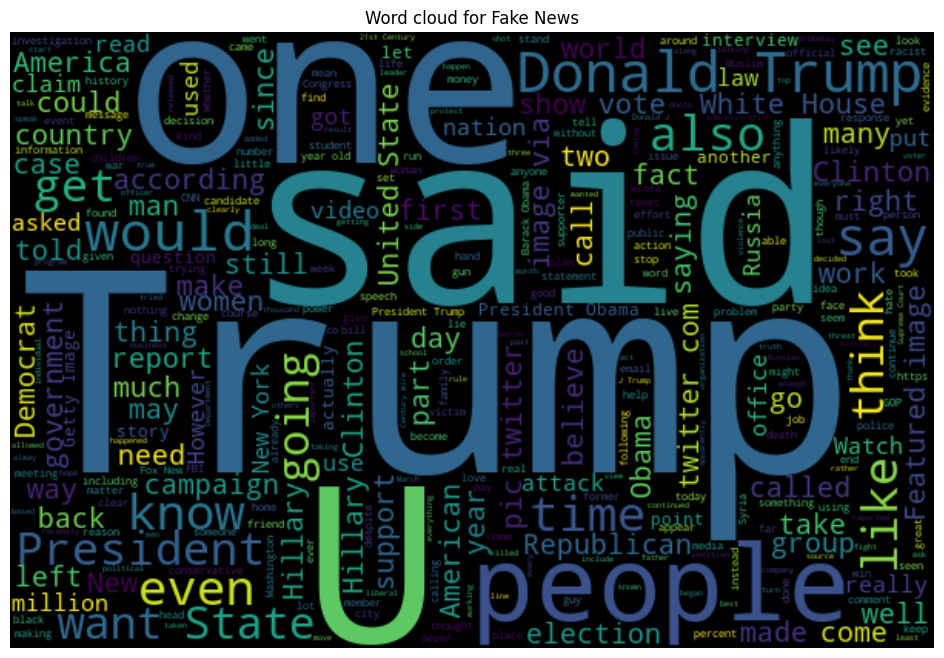

In [26]:
word_cloud = WordCloud(background_color='black', max_words=len(fake_str), stopwords=stop_words, width=600, height=400)
word_cloud.generate(fake_str)

# print('Word cloud for True News')
plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Word cloud for Fake News')

plt.axis('off')

plt.show()

In [28]:
#TF-IDF vectorization on the text data from the training and testing datasets, 
#converts the resulting sparse matrices to pandas DataFrames, and prints the shapes of the resulting DataFrames
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

# Vectorizing news
print('Vectorizing News')
tfidf_train = vectorizer.fit_transform(train_data['text'].values)
tfidf_test = vectorizer.transform(test_data['text'].values)

print('Converting to DataFrames')
q_tfidf_train = pd.DataFrame.sparse.from_spmatrix(tfidf_train)
q_tfidf_test = pd.DataFrame.sparse.from_spmatrix(tfidf_test)

print("Train data:", q_tfidf_train.shape)
print("Test data:", q_tfidf_test.shape)

Vectorizing News
Converting to DataFrames
Train data: (35918, 5000)
Test data: (8980, 5000)


In [28]:
vectorizer.get_feature_names_out()[2000:2010]

array(['indiana', 'individual', 'individuals', 'industry', 'influence',
       'information', 'informed', 'infrastructure', 'initial',
       'initially'], dtype=object)

In [29]:
q_tfidf_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.071551,0.0,0.079315,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.025323,0.0,0.000000,0.000000,0.064451,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.099179,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.018173,0.021207,0.000000,0.0,0.0,0.02346,0.020539,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [30]:
q_tfidf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35918 entries, 0 to 35917
Columns: 5000 entries, 0 to 4999
dtypes: Sparse[float64, 0](5000)
memory usage: 96.4 MB


In [31]:
print("Number of data points in train data :",q_tfidf_train.shape)
print("Train labels :",train_labels.shape)

print("Number of data points in test data :",q_tfidf_test.shape)
print("Test labels :",test_labels.shape)

Number of data points in train data : (35918, 5000)
Train labels : (35918,)
Number of data points in test data : (8980, 5000)
Test labels : (8980,)


In [32]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

# Vectorizing news
print('Vectorizing News')
tfidf_train = vectorizer.fit_transform(train_data['text'].values)
tfidf_test = vectorizer.transform(test_data['text'].values)

print('Converting to DataFrames')
q_tfidf_train = pd.DataFrame.sparse.from_spmatrix(tfidf_train)
q_tfidf_test = pd.DataFrame.sparse.from_spmatrix(tfidf_test)

print("Train data:", q_tfidf_train.shape)
print("Test data:", q_tfidf_test.shape)

Vectorizing News
Converting to DataFrames
Train data: (35918, 5000)
Test data: (8980, 5000)


In [29]:
# StandardScaler to standardize the TF-IDF features. ensures that features have zero mean and unit variance
scaler = StandardScaler(with_mean=False)

# Train data
model_train_std = scaler.fit_transform(q_tfidf_train)
# Test data
model_test = scaler.transform(q_tfidf_test)

In [34]:
train_labels.shape

(35918,)

In [36]:
# Balancing the train data
print("Train data before upsampling : ", sorted(Counter(train_labels).items()))

# sm = BorderlineSMOTE(random_state=2)
# model_train, train_labels = sm.fit_resample(model_train_std[:500], train_labels[:500].ravel())
# print('Resampled dataset shape %s' % Counter(train_labels))

Train data before upsampling :  [(0, 18785), (1, 17133)]


In [37]:
sns.set(style="whitegrid")
colors = sns.color_palette()

c:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


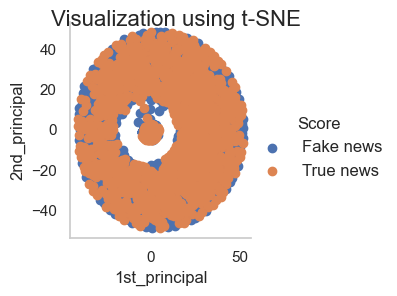

In [38]:
#t-SNE dimensionality reduction on the standardized training data, creates a DataFrame for visualization, and plots the 2D representation of the data with Seaborn.
model = TSNE(n_components=2, random_state=0, perplexity=30,  n_iter=1000, init='random')
tsne_data = model.fit_transform(model_train_std[:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, train_labels[:5000])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("1st_principal", "2nd_principal", "Score"))
new_labels = ['Fake news', 'True news']

# Ploting the result of tsne
g= sns.FacetGrid(tsne_df, hue="Score", legend_out=True).map(plt.scatter, "1st_principal", "2nd_principal")  \
                                          .add_legend(labels = new_labels, loc=5, fontsize=12)

g.fig.suptitle('Visualization using t-SNE', fontsize=16)
g.ax.grid(False)
plt.show()

c:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


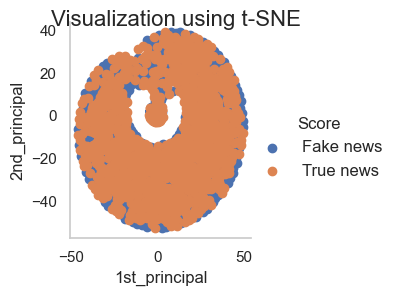

In [39]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=1000, init='random')
tsne_data = model.fit_transform(model_train_std[:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, train_labels[:5000])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("1st_principal", "2nd_principal", "Score"))
new_labels = ['Fake news', 'True news']

# Ploting the result of tsne
g= sns.FacetGrid(tsne_df, hue="Score", legend_out=True).map(plt.scatter, "1st_principal", "2nd_principal")  \
                                          .add_legend(labels = new_labels, loc=5, fontsize=12)

g.fig.suptitle('Visualization using t-SNE', fontsize=16)
g.ax.grid(False)
plt.show()

In [17]:
def plot_confusion_matrices(true, pred):
  conf = confusion_matrix(true, pred)
  precision = (conf.T / conf.sum(axis=1)).T
  recall = (conf / conf.sum(axis=0))

  # Plotting the matrices
  plt.figure(figsize=(24,6))

  # Set axes labels
  labels = ['0', '1']

  # Set colourmap
  cmap = sns.light_palette((0.2, 0.5, 0.8), as_cmap=True)

  # Plot normal confusion matrix
  plt.subplot(1, 3, 1)
  sns.heatmap(conf, cmap=cmap, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')

  # Plot precision confusion matrix
  plt.subplot(1, 3, 2)
  sns.heatmap(precision, cmap=cmap, annot=True, fmt='.3f', xticklabels=labels, yticklabels=labels,cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Precision Matrix')

  # Plot recall confusion matrix
  plt.subplot(1, 3, 3)
  sns.heatmap(recall, cmap=cmap, annot=True, fmt='.3f', xticklabels=labels, yticklabels=labels,cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Recall Matrix')

  plt.show()

In [23]:
def plot_confusion_matrices(true, pred):
  conf = confusion_matrix(true, pred)
  precision = (conf.T / conf.sum(axis=1)).T
  recall = (conf / conf.sum(axis=0))

  # Plotting the matrices
  plt.figure(figsize=(24,6))

  # Set axes labels
  labels = ['0', '1']

  # Set colourmap
  cmap = sns.light_palette('purple')

  # Plot normal confusion matrix
  plt.subplot(1, 3, 1)
  sns.heatmap(conf, cmap=cmap, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')

  # Plot precision confusion matrix
  plt.subplot(1, 3, 2)
  sns.heatmap(precision, cmap=cmap, annot=True, fmt='.3f', xticklabels=labels, yticklabels=labels,cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Precision Matrix')

  # Plot recall confusion matrix
  plt.subplot(1, 3, 3)
  sns.heatmap(recall, cmap=cmap, annot=True, fmt='.3f', xticklabels=labels, yticklabels=labels,cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Recall Matrix')

  plt.show()

In [21]:
def plot_confusion_matrices(true, pred):
  conf = confusion_matrix(true, pred)
  precision = (conf.T / conf.sum(axis=1)).T
  recall = (conf / conf.sum(axis=0))

  # Plotting the matrices
  plt.figure(figsize=(24,6))

  # Set axes labels
  labels = ['0', '1']

  # Set colourmap
  cmap = sns.light_palette('purple')

  # Plot normal confusion matrix
  plt.subplot(1, 3, 1)
  sns.heatmap(conf, cmap=cmap, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')

  # Plot precision confusion matrix
  plt.subplot(1, 3, 2)
  sns.heatmap(precision, cmap=cmap, annot=True, fmt='.3f', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Precision Matrix')

  # Plot recall confusion matrix
  plt.subplot(1, 3, 3)
  sns.heatmap(recall, cmap=cmap, annot=True, fmt='.3f', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Recall Matrix')

  plt.show()

Log-loss for a random model is: 0.87539



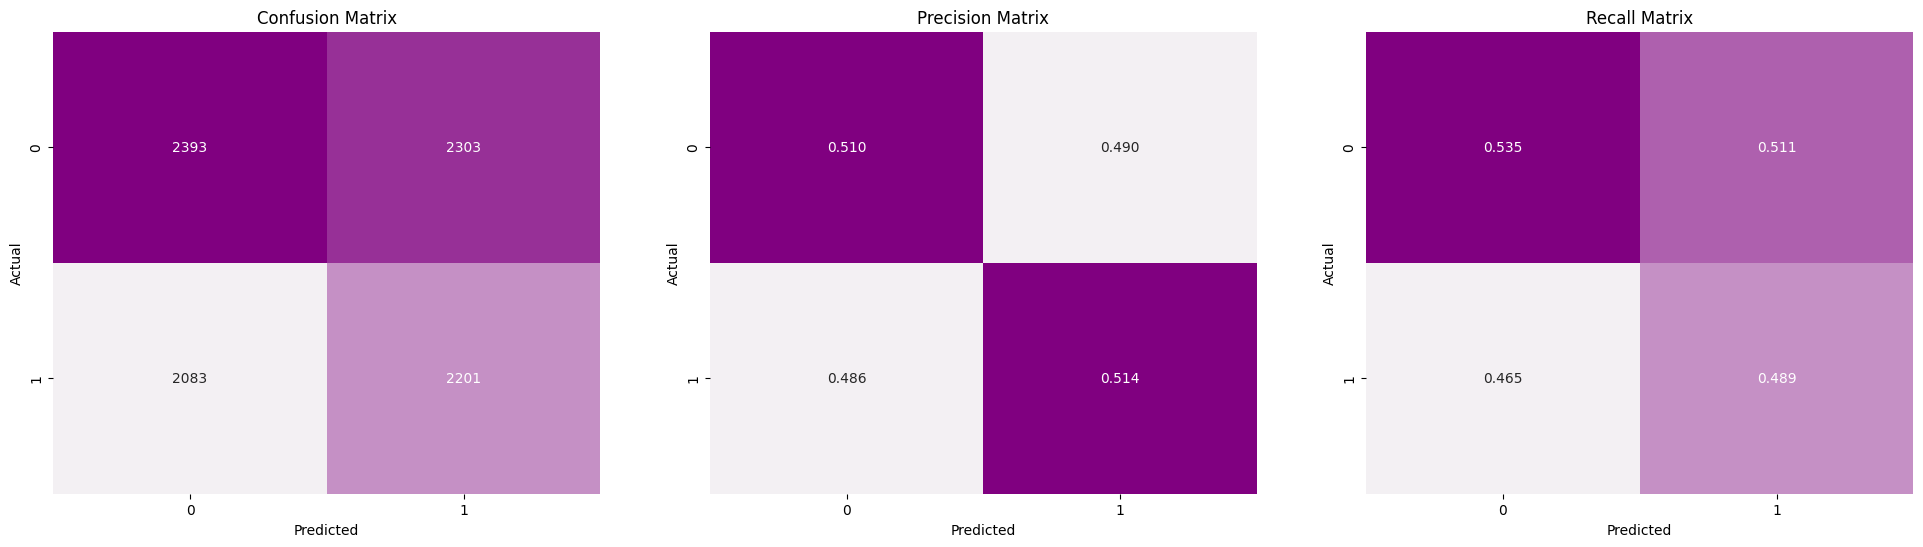

In [24]:
predicted = np.zeros((len(test_labels), 2))

for i in range(len(test_labels)):
  # Getting 2 random values
  prob = np.random.rand(1, 2)

  # Making so that both the random values sum to 1
  predicted[i] = (prob / sum(sum(prob)))[0]

# Log-loss on the positive class label
random_logloss = log_loss(test_labels, predicted[:, 1])
print('Log-loss for a random model is: {:.5f}\n'.format(random_logloss))

# Now we assign class labels 0 or 1 depending on which has higher probabilities
# This way we can create confusion matrices
predicted = np.argmax(predicted, axis=1)
plot_confusion_matrices(test_labels, predicted)

L1 Regularization
Regularization: L1	alpha = 1e-05	loss: 0.03692797169476969
Regularization: L1	alpha = 0.0001	loss: 0.046834146293047454


c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn

Regularization: L1	alpha = 0.001	loss: 0.06027573826684542


c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Regularization: L1	alpha = 0.01	loss: 0.11594659516717101
Regularization: L1	alpha = 0.1	loss: 0.6183509794223757
Regularization: L1	alpha = 1	loss: 0.6912431453479478
Regularization: L1	alpha = 10	loss: 0.6920943425774421

L2 Regularization
Regularization: L2	alpha = 1e-05	loss: 0.03174584341870581
Regularization: L2	alpha = 0.0001	loss: 0.030823440844329145
Regularization: L2	alpha = 0.001	loss: 0.029155266787252544
Regularization: L2	alpha = 0.01	loss: 0.025875468903540397
Regularization: L2	alpha = 0.1	loss: 0.03901602828257047
Regularization: L2	alpha = 1	loss: 0.06962463729477855
Regularization: L2	alpha = 10	loss: 0.11334525335550032

ElasticNet Regularization
Regularization: ElasticNet	alpha = 1e-05	loss: 0.0336909332330591
Regularization: ElasticNet	alpha = 0.0001	loss: 0.031415993955644636
Regularization: ElasticNet	alpha = 0.001	loss: 0.021364081815791816
Regularization: ElasticNet	alpha = 0.01	loss: 0.02541930335540062
Regularization: ElasticNet	alpha = 0.1	loss: 0.05541572

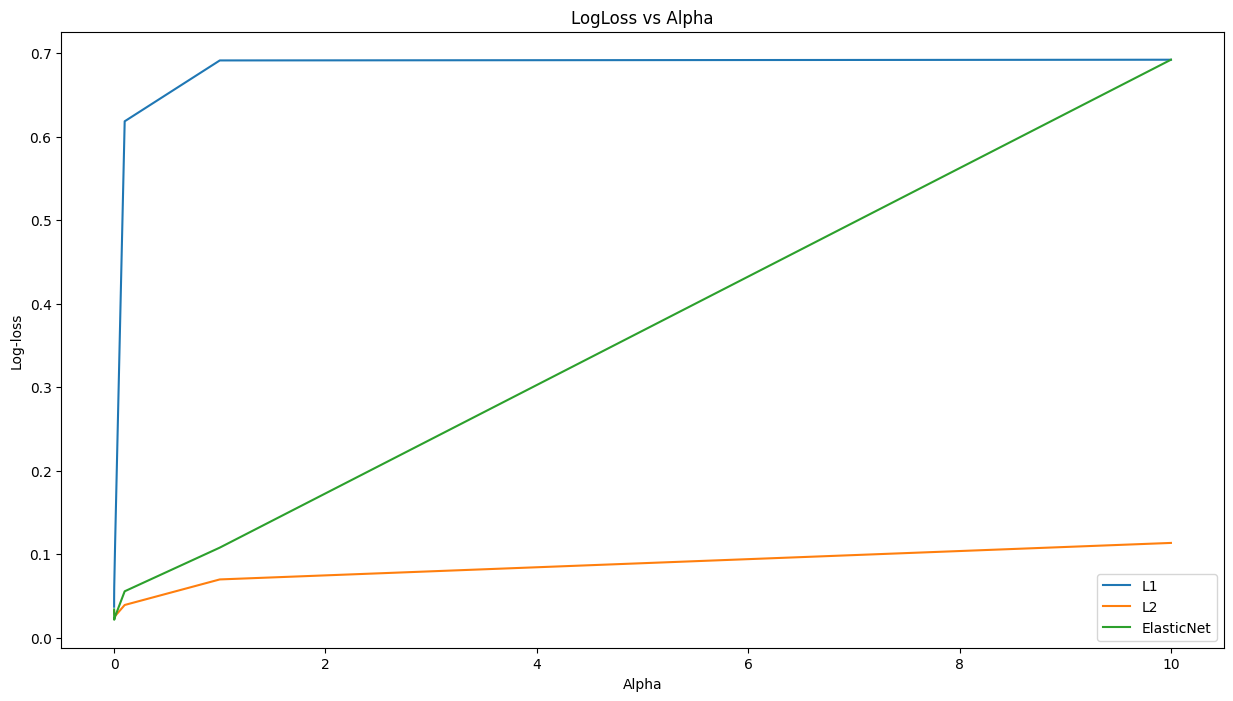

In [30]:
alpha = [10**x for x in range(-5, 2)]

l1_logloss = []
l2_logloss = []
elasticnet_logloss = []

#hyperparameter tuning for L1 regularization
#encourage sparsity
print('L1 Regularization')
for a in alpha:
  sgd_clf = SGDClassifier(loss='log_loss', alpha=a, penalty='l1', n_jobs=-1, random_state=42)
  sgd_clf.fit(model_train_std, train_labels)
  cal_clf = CalibratedClassifierCV(sgd_clf)
  cal_clf.fit(model_train_std, train_labels)
  pred_prob = cal_clf.predict_proba(model_test)
  loss = (log_loss(test_labels, pred_prob))
  l1_logloss.append(loss)

  print('Regularization: {}\talpha = {}\tloss: {}'.format('L1', a, loss))

#hyperparameter tuning for L2 regularization
print('\nL2 Regularization')
for a in alpha:
  sgd_clf = SGDClassifier(loss='log_loss', alpha=a, penalty='l2', n_jobs=-1, random_state=42)
  sgd_clf.fit(model_train_std, train_labels)
  cal_clf = CalibratedClassifierCV(sgd_clf)
  cal_clf.fit(model_train_std, train_labels)
  pred_prob = cal_clf.predict_proba(model_test)
  loss = (log_loss(test_labels, pred_prob))
  l2_logloss.append(loss)

  print('Regularization: {}\talpha = {}\tloss: {}'.format('L2', a, loss))

#hyperparameter tuning for elastic regularization
print('\nElasticNet Regularization')
for a in alpha:
  sgd_clf = SGDClassifier(loss='log_loss', alpha=a, penalty='elasticnet', n_jobs=-1, random_state=42)
  sgd_clf.fit(model_train_std, train_labels)
  cal_clf = CalibratedClassifierCV(sgd_clf)
  cal_clf.fit(model_train_std, train_labels)
  pred_prob = cal_clf.predict_proba(model_test)
  loss = (log_loss(test_labels, pred_prob))
  elasticnet_logloss.append(loss)

  print('Regularization: {}\talpha = {}\tloss: {}'.format('ElasticNet', a, loss))

print('\n')

# Plotting hyperparamter tuning results
plt.figure(figsize=(15, 8))

# L1 plot
sns.lineplot(x=alpha, y=l1_logloss, label='L1')

# L2 plot
sns.lineplot(x=alpha, y=l2_logloss, label='L2')

# ElasticNet plot
sns.lineplot(x=alpha, y=elasticnet_logloss, label='ElasticNet')

# Setting plot title, axes labels and legend
plt.title('LogLoss vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Log-loss')
plt.legend()

plt.show()

Log loss for best alpha on train data: 0.010986150003939633
Log loss for best alpha on test data: 0.025875468903540397




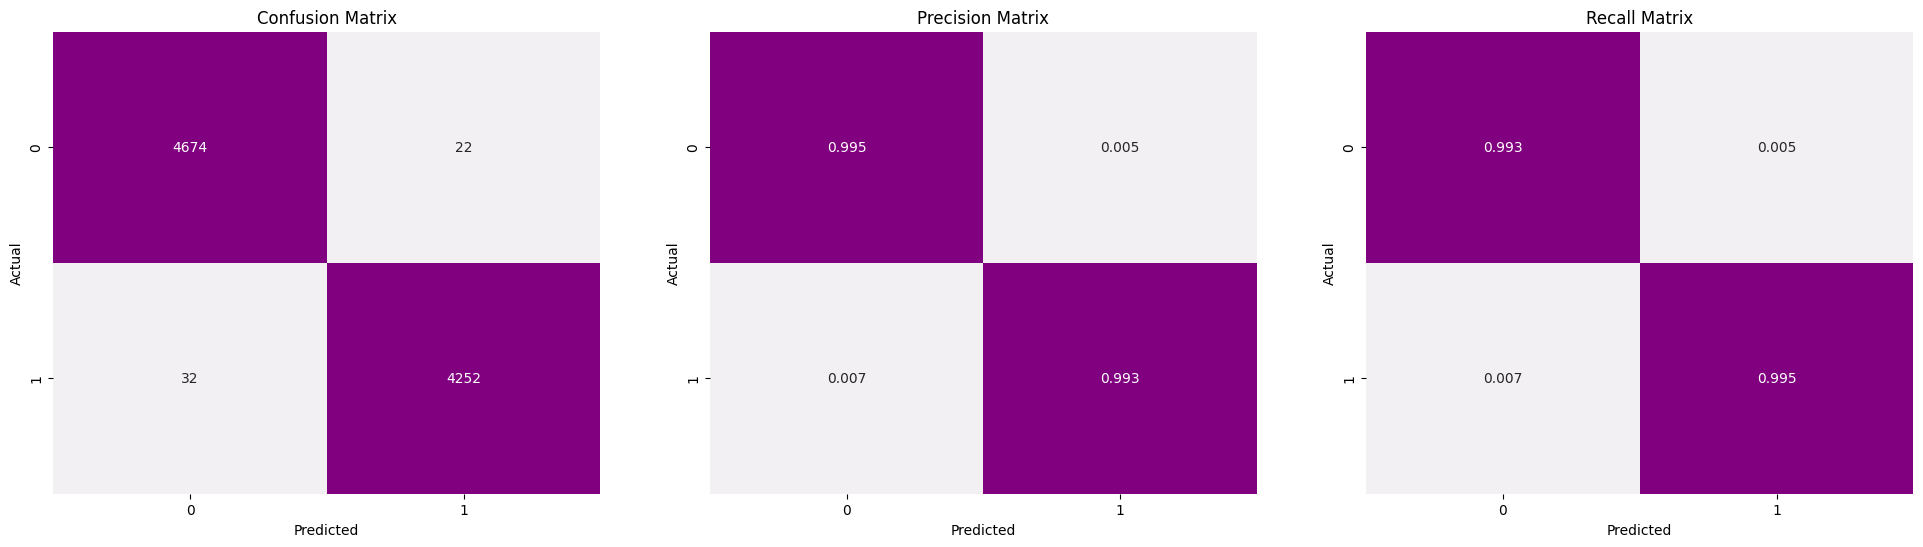

In [31]:
best_alpha = alpha[np.argmin(l2_logloss)]

# Now we train SGDClassifier with best alpha and regularization
sgd_clf_LR = SGDClassifier(loss='log_loss', alpha=best_alpha, penalty='l2', n_jobs=-1, random_state=42)

# Train model
sgd_clf_LR.fit(model_train_std, train_labels)

# Initialize calibration model
cal_clf_LR = CalibratedClassifierCV(sgd_clf_LR)

# Fit calibration model
cal_clf_LR.fit(model_train_std, train_labels)

# Predict
predict_train = cal_clf_LR.predict_proba(model_train_std)
predict_test = cal_clf_LR.predict_proba(model_test)

print('Log loss for best alpha on train data: {}'.format(log_loss(train_labels, predict_train)))
print('Log loss for best alpha on test data: {}'.format(log_loss(test_labels, predict_test)))

print('\n')

# Convert probabilities to 0 or 1 and plot test confusion matrices
predicted = np.argmax(predict_test, axis=1)
plot_confusion_matrices(test_labels, predicted)

In [63]:
#list of tuples, each containing a feature's coefficient and its corresponding name. 
#The list is sorted in descending order based on the absolute values of the coefficients
feature_names = vectorizer.get_feature_names_out()
sorted(zip(sgd_clf_LR.coef_[0],feature_names), reverse=True)[:20]

[(0.6546447620788428, 'reuters'),
 (0.255543904331837, 'said'),
 (0.25469968093433437, 'washington reuters'),
 (0.17845878087692085, 'reuters the'),
 (0.14626363609149903, 'on'),
 (0.14589590733665803, 'said on'),
 (0.14055180161784106, 'on tuesday'),
 (0.13035400406585163, 'reuters president'),
 (0.12879896265674126, 'on wednesday'),
 (0.12709885810506472, 'on friday'),
 (0.12007375007063242, 'president donald'),
 (0.11972660836657194, 'president donald trump'),
 (0.11039756775081529, 'washington'),
 (0.10855931979554476, 'york reuters'),
 (0.10855931979554476, 'new york reuters'),
 (0.10545584312550255, 'on monday'),
 (0.1045062428081664, 'on thursday'),
 (0.1042000818791295, 'republican'),
 (0.09566916229504717, 'bit'),
 (0.09448896790540469, 'said in')]

In [66]:
sorted(zip(sgd_clf_LR.coef_[0],feature_names))[:20]

[(-0.3228201489329913, 'via'),
 (-0.2615322121600322, 'read more'),
 (-0.17059907672091412, 'president trump'),
 (-0.16989320121605328, 'read'),
 (-0.14568081954776527, 'this'),
 (-0.13996991248395574, 'the us'),
 (-0.13896904754344405, 'featured image'),
 (-0.13749267661159717, 'mr'),
 (-0.12618139966221575, 'featured'),
 (-0.1248275775220124, 'just'),
 (-0.12404754345241056, 'watch'),
 (-0.12282994103448058, 'sen'),
 (-0.12210273145119956, 'rep'),
 (-0.11858537232017378, 'gop'),
 (-0.11531173457763523, 'com'),
 (-0.11467302968129665, 'image'),
 (-0.10970115583075045, 'hillary'),
 (-0.10891375902786711, 'https'),
 (-0.10761908228596853, 'obama'),
 (-0.10698554738803681, 'us')]

In [ ]:
# svm

L1 Regularization
Regularization: L1	alpha = 1e-05	loss: 0.037752889402432516
Regularization: L1	alpha = 0.0001	loss: 0.04704237851825451


c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn

Regularization: L1	alpha = 0.001	loss: 0.06069084202180445


c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Regularization: L1	alpha = 0.01	loss: 0.12273946356550153
Regularization: L1	alpha = 0.1	loss: 0.602371313699302
Regularization: L1	alpha = 1	loss: 0.6907571802250242
Regularization: L1	alpha = 10	loss: 0.6912431453479385

L2 Regularization
Regularization: L2	alpha = 1e-05	loss: 0.03298816174499868
Regularization: L2	alpha = 0.0001	loss: 0.03339605960420835
Regularization: L2	alpha = 0.001	loss: 0.030441286849146133
Regularization: L2	alpha = 0.01	loss: 0.02817301053447422
Regularization: L2	alpha = 0.1	loss: 0.027965553917647906
Regularization: L2	alpha = 1	loss: 0.0417099744563019
Regularization: L2	alpha = 10	loss: 0.08090676933363959

ElasticNet Regularization
Regularization: ElasticNet	alpha = 1e-05	loss: 0.03292351413841524
Regularization: ElasticNet	alpha = 0.0001	loss: 0.031039864100312273
Regularization: ElasticNet	alpha = 0.001	loss: 0.02115776266136502
Regularization: ElasticNet	alpha = 0.01	loss: 0.020003643005166844
Regularization: ElasticNet	alpha = 0.1	loss: 0.0345268244

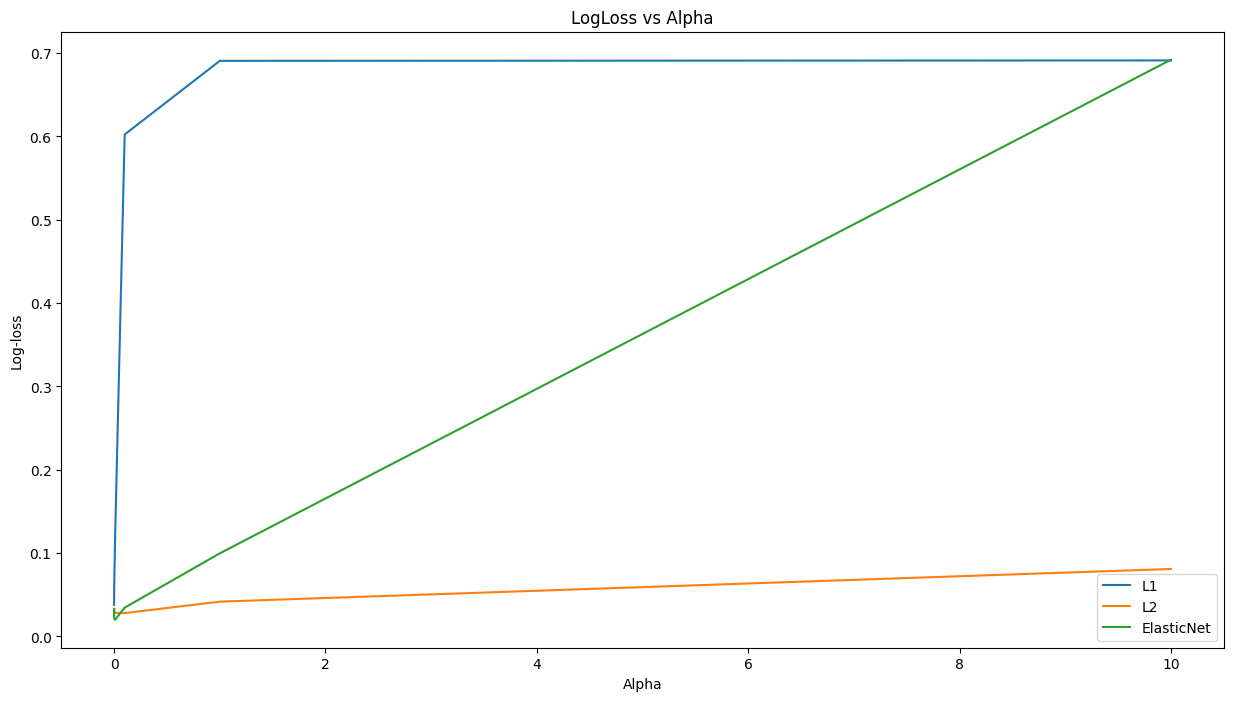

In [33]:
# Set list of hyperparameter: alpha to iterate over
# We will use this list for both L1, L2 and elasticnet regularization
# alpha ranges from 0.00001 to 10 (7 values)
alpha = [10**x for x in range(-5, 2)]

# Create lists to hold values for log-loss for L1, L2 and ElasticNet
l1_logloss = []
l2_logloss = []
elasticnet_logloss = []

# We will also perform model calibration for better results
# L1 regularization
# Iterate over alphas
print('L1 Regularization')
for a in alpha:
  # Initialize SGDClassifier
  sgd_clf = SGDClassifier(loss='hinge', alpha=a, penalty='l1', n_jobs=-1, random_state=42)
  
  # Fit/train model
  sgd_clf.fit(model_train_std, train_labels)

  # Initialize calibration model
  cal_clf = CalibratedClassifierCV(sgd_clf)
  
  # Fit calibration model
  cal_clf.fit(model_train_std, train_labels)

  # Predict on test data
  pred_prob = cal_clf.predict_proba(model_test)

  # Get log-loss on predictions
  loss = (log_loss(test_labels, pred_prob))
  l1_logloss.append(loss)

  print('Regularization: {}\talpha = {}\tloss: {}'.format('L1', a, loss))


# L2 regularization
# Iterate over alphas
print('\nL2 Regularization')
for a in alpha:
  # Initialize SGDClassifier
  sgd_clf = SGDClassifier(loss='hinge', alpha=a, penalty='l2', n_jobs=-1, random_state=42)
  
  # Fit/train model
  sgd_clf.fit(model_train_std, train_labels)

  # Initialize calibration model
  cal_clf = CalibratedClassifierCV(sgd_clf)
  
  # Fit calibration model
  cal_clf.fit(model_train_std, train_labels)

  # Predict on test data
  pred_prob = cal_clf.predict_proba(model_test)

  # Get log-loss on predictions
  loss = (log_loss(test_labels, pred_prob))
  l2_logloss.append(loss)

  print('Regularization: {}\talpha = {}\tloss: {}'.format('L2', a, loss))

# elasticnet regularization
# Iterate over alphas
print('\nElasticNet Regularization')
for a in alpha:
  # Initialize SGDClassifier
  sgd_clf = SGDClassifier(loss='hinge', alpha=a, penalty='elasticnet', n_jobs=-1, random_state=42)
  
  # Fit/train model
  sgd_clf.fit(model_train_std, train_labels)

  # Initialize calibration model
  cal_clf = CalibratedClassifierCV(sgd_clf)
  
  # Fit calibration model
  cal_clf.fit(model_train_std, train_labels)

  # Predict on test data
  pred_prob = cal_clf.predict_proba(model_test)

  # Get log-loss on predictions
  loss = (log_loss(test_labels, pred_prob))
  elasticnet_logloss.append(loss)

  print('Regularization: {}\talpha = {}\tloss: {}'.format('ElasticNet', a, loss))

print('\n')

# Plotting hyperparamter tuning results
plt.figure(figsize=(15, 8))

# L1 plot
sns.lineplot(x=alpha, y=l1_logloss, label='L1')

# L2 plot
sns.lineplot(x=alpha, y=l2_logloss, label='L2')

# ElasticNet plot
sns.lineplot(x=alpha, y=elasticnet_logloss, label='ElasticNet')

# Setting plot title, axes labels and legend
plt.title('LogLoss vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Log-loss')
plt.legend()

plt.show()

Log loss for best alpha on train data: 0.01192783599592437
Log loss for best alpha on test data: 0.02115776266136502




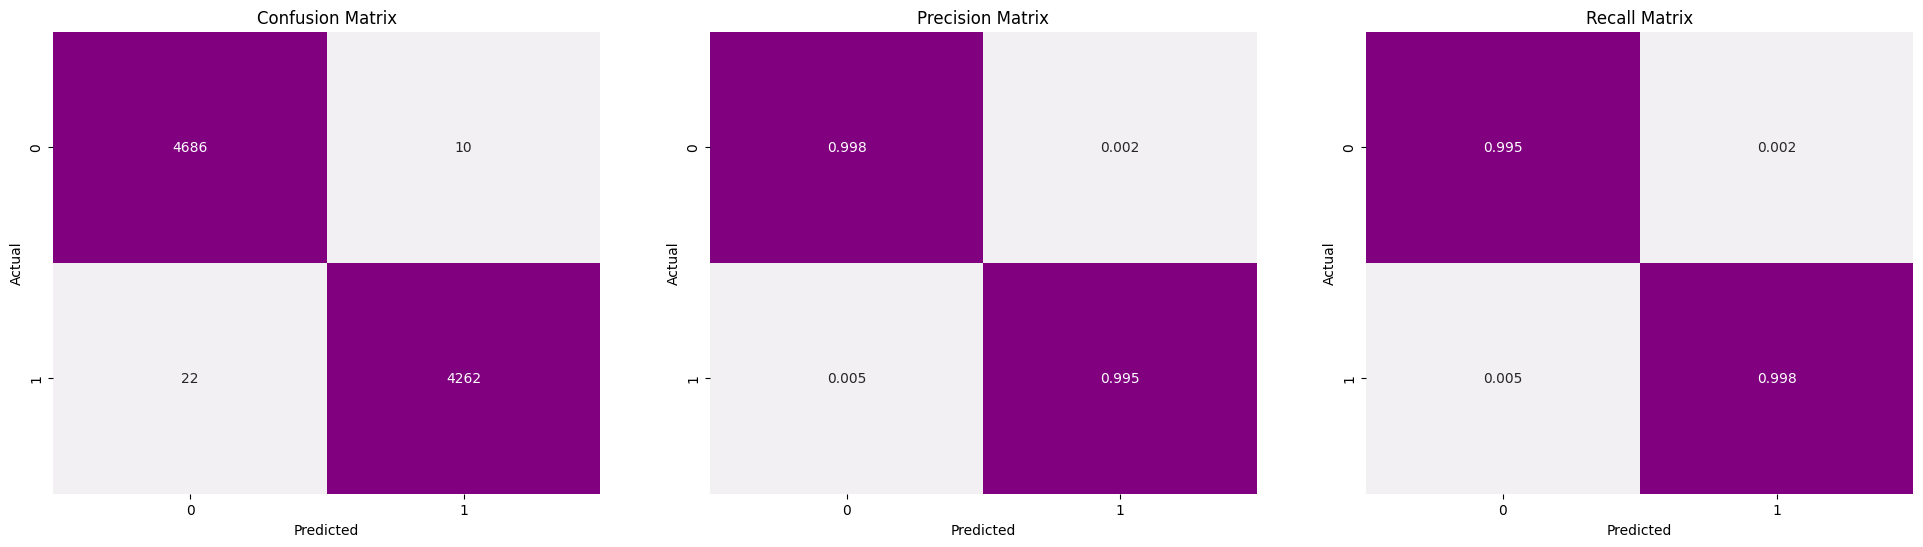

In [32]:
# Finding best alpha
best_alpha = alpha[np.argmin(elasticnet_logloss)]

# Now we train SGDClassifier with best alpha and regularization
sgd_clf_SVM = SGDClassifier(loss='hinge', alpha=best_alpha, penalty='elasticnet', n_jobs=-1, random_state=42)

# Train model
sgd_clf_SVM.fit(model_train_std, train_labels)

# Initialize calibration model
cal_clf_SVM = CalibratedClassifierCV(sgd_clf_SVM)

# Fit calibration model
cal_clf_SVM.fit(model_train_std, train_labels)

# Predict
predict_train = cal_clf_SVM.predict_proba(model_train_std)
predict_test = cal_clf_SVM.predict_proba(model_test)

print('Log loss for best alpha on train data: {}'.format(log_loss(train_labels, predict_train)))
print('Log loss for best alpha on test data: {}'.format(log_loss(test_labels, predict_test)))

print('\n')

# Convert probabilities to 0 or 1 and plot test confusion matrices
predicted = np.argmax(predict_test, axis=1)
plot_confusion_matrices(test_labels, predicted)

In [50]:
# Dumping the model into a pickel file

pickle.dump(cal_clf_SVM, open('SVM_model.pkl', 'wb'))

In [76]:
# Convert probabilities to 0 or 1 and calculate accuracy
predicted_train = np.argmax(predict_train, axis=1)
predicted_test = np.argmax(predict_test, axis=1)

# Accuracy
train_score = accuracy_score(train_labels, predicted_train)
test_score = accuracy_score(test_labels, predicted_test)
print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)

Train Accuracy: 0.9972158806169609
Test Accuracy: 0.9956570155902005


In [78]:
# Printing the words which are more commom in True news

feature_names = vectorizer.get_feature_names_out()
sorted(zip(sgd_clf_LR.coef_[0],feature_names), reverse=True)[:20]

[(0.6546447620788428, 'reuters'),
 (0.255543904331837, 'said'),
 (0.25469968093433437, 'washington reuters'),
 (0.17845878087692085, 'reuters the'),
 (0.14626363609149903, 'on'),
 (0.14589590733665803, 'said on'),
 (0.14055180161784106, 'on tuesday'),
 (0.13035400406585163, 'reuters president'),
 (0.12879896265674126, 'on wednesday'),
 (0.12709885810506472, 'on friday'),
 (0.12007375007063242, 'president donald'),
 (0.11972660836657194, 'president donald trump'),
 (0.11039756775081529, 'washington'),
 (0.10855931979554476, 'york reuters'),
 (0.10855931979554476, 'new york reuters'),
 (0.10545584312550255, 'on monday'),
 (0.1045062428081664, 'on thursday'),
 (0.1042000818791295, 'republican'),
 (0.09566916229504717, 'bit'),
 (0.09448896790540469, 'said in')]

In [79]:
sorted(zip(sgd_clf_SVM.coef_[0],feature_names))[:20]

[(-0.4177816831342045, 'via'),
 (-0.21290989243298597, 'read more'),
 (-0.14110484257901101, 'this'),
 (-0.11359372169577515, 'featured image'),
 (-0.10808414750336459, 'president trump'),
 (-0.10728903955555351, 'watch'),
 (-0.09932070279178468, 'hillary'),
 (-0.09766899148248505, 'the us'),
 (-0.08932649539968818, 'https'),
 (-0.08179022584072926, 'just'),
 (-0.08066403998789333, 'gop'),
 (-0.07865729478289059, 'rep'),
 (-0.06661610514039547, 'you'),
 (-0.06316540098156587, 'us'),
 (-0.06198500605047232, 'obama'),
 (-0.06168842504333063, 'getty images'),
 (-0.06104989269932384, 'getty'),
 (-0.06103263473723126, 'these'),
 (-0.06023034197729998, 'com'),
 (-0.05579130862677164, 'sen')]

In [ ]:
# gbdt

In [41]:
# First, we create the list of hyperparameters to iterate over
max_depth = [2, 4, 6, 8]
n_estimators = [10, 100, 500, 1000]

# Initialize list to store log-loss results
result_logloss = []

# Iterating over max_depth
for depth in max_depth:
  # Initialize list to store log loss for this iteration
  logloss = []
  # Iterate over n_estimators
  for n in n_estimators:
    print('Running at depth: {}, n_estimators: {}'.format(depth, n))

    # Initialize model
    gbdt_clf = xgb.XGBClassifier(max_depth=depth, n_estimators=n, objective='binary:logistic', n_jobs=-1, random_state=42)

    # Fitting on train data
    gbdt_clf.fit(model_train_std, train_labels)

    # Predict on test data
    pred_prob = gbdt_clf.predict_proba(model_test)

    # Get log loss on training data
    pred_prob_training = gbdt_clf.predict_proba(model_train_std)
    loss_training = log_loss(train_labels, pred_prob_training)

    # Get log-loss on predictions
    loss = (log_loss(test_labels, pred_prob))
    logloss.append(loss)

    # Print training and test loss for this iteration
    print('Train loss: {0} \tTest loss: {1}\n'.format(loss_training, loss))

  result_logloss.append(logloss)

Running at depth: 2, n_estimators: 10
Train loss: 0.037596079353300574 	Test loss: 0.0379195136388214

Running at depth: 2, n_estimators: 100
Train loss: 0.0023695365591068075 	Test loss: 0.006215983685003973

Running at depth: 2, n_estimators: 500
Train loss: 0.000337324489601998 	Test loss: 0.005005487343257805

Running at depth: 2, n_estimators: 1000
Train loss: 0.0002804066496147912 	Test loss: 0.005596055282599692

Running at depth: 4, n_estimators: 10
Train loss: 0.02987763304066726 	Test loss: 0.03247488343515854

Running at depth: 4, n_estimators: 100
Train loss: 0.00045035800364893916 	Test loss: 0.005943506250154571

Running at depth: 4, n_estimators: 500
Train loss: 0.00028611731191611247 	Test loss: 0.006465188706130308

Running at depth: 4, n_estimators: 1000
Train loss: 0.00027227329051168964 	Test loss: 0.006782754206077341

Running at depth: 6, n_estimators: 10
Train loss: 0.027630202055071006 	Test loss: 0.030548972572270423

Running at depth: 6, n_estimators: 100
Trai

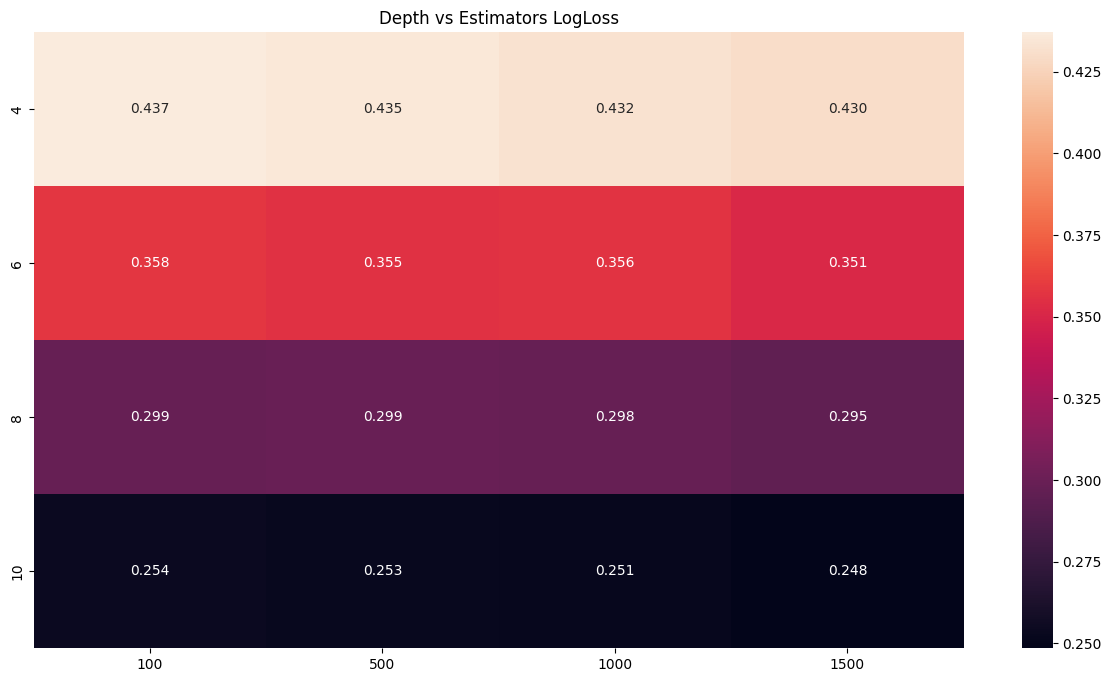

In [36]:
# Plot log loss heatmap
plt.figure(figsize=(15,8))
sns.heatmap(result_logloss, annot=True, fmt='.3f', xticklabels=n_estimators, yticklabels=max_depth)
plt.title('Depth vs Estimators LogLoss')

plt.show()

Log loss for best alpha on train data: 0.0003398686469441179
Log loss for best alpha on test data: 0.006254853200533742




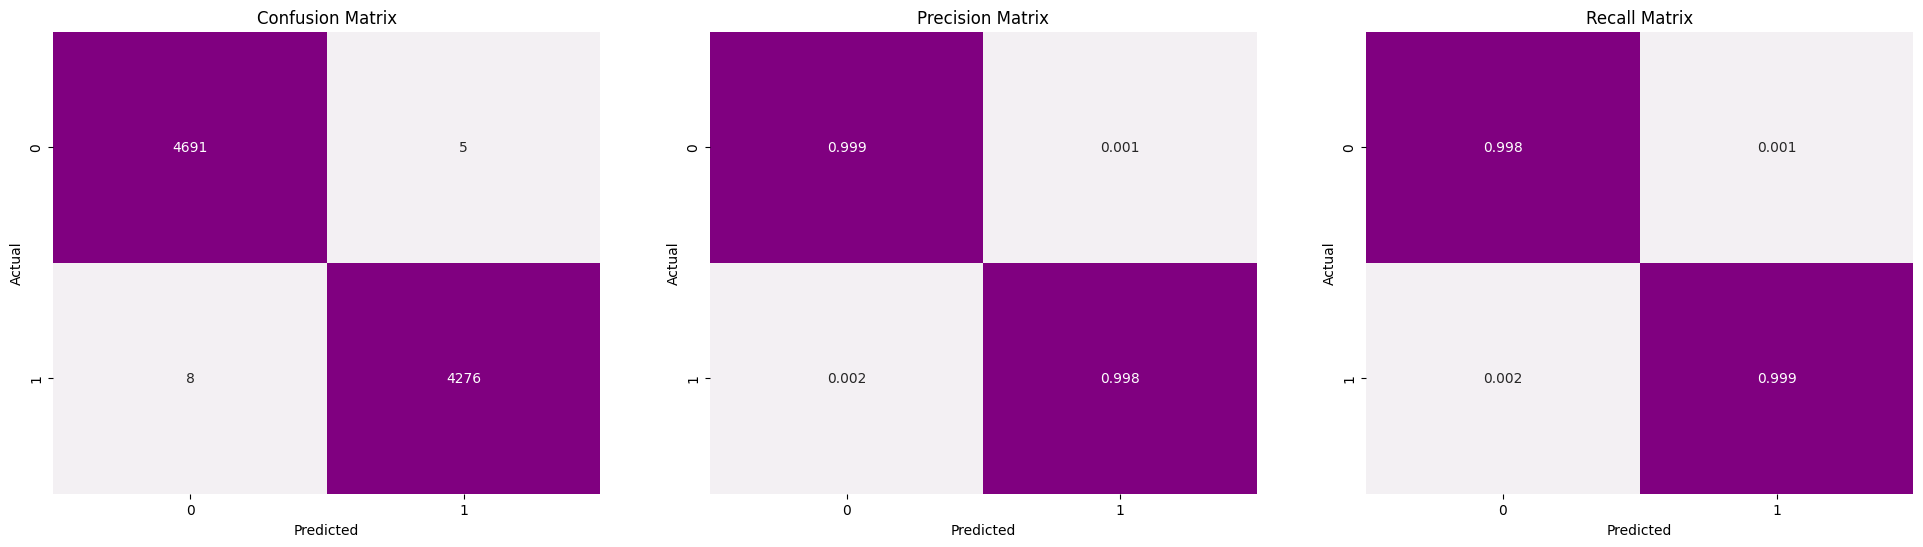

In [37]:
# Setting best hyperparameters

n_estimators= 500
max_depth= 2 

# Initialize model
gbdt_clf = xgb.XGBClassifier(max_depth=max_depth, n_estimators=n_estimators, objective='binary:logistic', n_jobs=-1, random_state=42)

# Fitting on train data
gbdt_clf.fit(model_train_std, train_labels)

# Predict
predict_train = gbdt_clf.predict_proba(model_train_std)
predict_test = gbdt_clf.predict_proba(model_test)

print('Log loss for best alpha on train data: {}'.format(log_loss(train_labels, predict_train)))
print('Log loss for best alpha on test data: {}'.format(log_loss(test_labels, predict_test)))

print('\n')

# Convert probabilities to 0 or 1 and plot test confusion matrices
predicted = np.argmax(predict_test, axis=1)
plot_confusion_matrices(test_labels, predicted)

In [45]:
# Dumping the model into a pickel file

pickle.dump(gbdt_clf, open('GBDT_model.pkl', 'wb'))

In [87]:
# Convert probabilities to 0 or 1 and calculate accuracy
predicted_train = np.argmax(predict_train, axis=1)
predicted_test = np.argmax(predict_test, axis=1)

# Accuracy
train_score = accuracy_score(train_labels, predicted_train)
test_score = accuracy_score(test_labels, predicted_test)
print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)

Train Accuracy: 0.9999721588061696
Test Accuracy: 0.9985523385300669


In [ ]:
# Rf

In [38]:
# First, we create the list of hyperparameters to iterate over
max_depth = [4, 6, 8, 10]
n_estimators = [100, 500, 1000, 1500]

# Initialize list to store log-loss results
result_logloss = []

# Iterating over max_depth
for depth in max_depth:
  # Initialize list to store log loss for this iteration
  logloss = []
  # Iterate over n_estimators
  for n in n_estimators:
    print('Running at depth: {}, n_estimators: {}'.format(depth, n))

    # Initialize model
    gbdt_clf = RandomForestClassifier(max_depth=depth, n_estimators=n, n_jobs=-1, random_state=42)

    # Fitting on train data
    gbdt_clf.fit(model_train_std, train_labels)

    # Predict on test data
    pred_prob = gbdt_clf.predict_proba(model_test)

    # Get log-loss on predictions
    loss = (log_loss(test_labels, pred_prob))
    logloss.append(loss)

  result_logloss.append(logloss)

Running at depth: 4, n_estimators: 100
Running at depth: 4, n_estimators: 500
Running at depth: 4, n_estimators: 1000


c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Running at depth: 4, n_estimators: 1500


c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Running at depth: 6, n_estimators: 100
Running at depth: 6, n_estimators: 500


c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Running at depth: 6, n_estimators: 1000


c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Running at depth: 6, n_estimators: 1500


c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Running at depth: 8, n_estimators: 100
Running at depth: 8, n_estimators: 500


c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Running at depth: 8, n_estimators: 1000


c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Running at depth: 8, n_estimators: 1500


c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Running at depth: 10, n_estimators: 100
Running at depth: 10, n_estimators: 500
Running at depth: 10, n_estimators: 1000


c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Running at depth: 10, n_estimators: 1500


c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


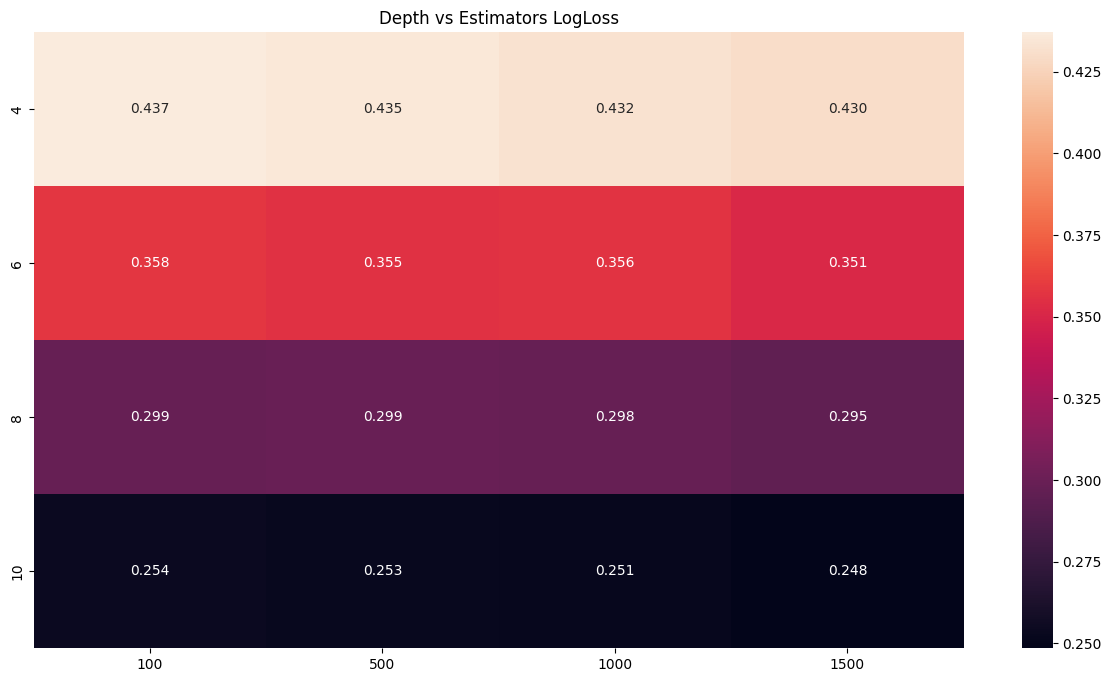

In [39]:
# Plot log loss heatmap
plt.figure(figsize=(15,8))
sns.heatmap(result_logloss, annot=True, fmt='.3f', xticklabels=n_estimators, yticklabels=max_depth)
plt.title('Depth vs Estimators LogLoss')

plt.show()

c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Log loss for best alpha on train data: 0.2405942533920636
Log loss for best alpha on test data: 0.25147603221374965




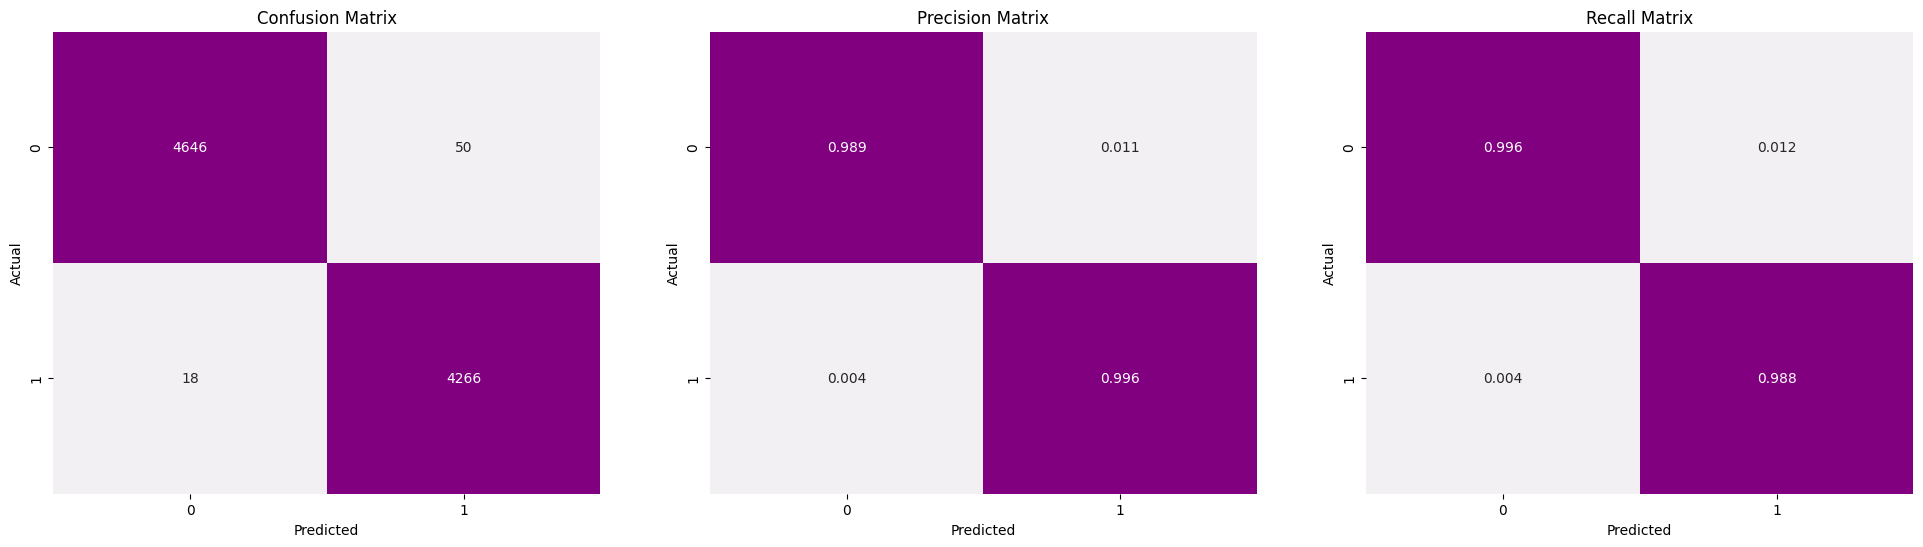

In [40]:
# Setting best hyperparameters
n_estimators=1000
max_depth= 10 

# Initialize model
rf_clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, criterion='gini', n_jobs=-1, random_state=42)

# Fitting on train data
rf_clf.fit(model_train_std, train_labels)

# Predict
predict_train = rf_clf.predict_proba(model_train_std)
predict_test = rf_clf.predict_proba(model_test)

print('Log loss for best alpha on train data: {}'.format(log_loss(train_labels, predict_train)))
print('Log loss for best alpha on test data: {}'.format(log_loss(test_labels, predict_test)))

print('\n')

# Convert probabilities to 0 or 1 and plot test confusion matrices
predicted = np.argmax(predict_test, axis=1)
plot_confusion_matrices(test_labels, predicted)

In [93]:
# Dumping the model into a pickel file

pickle.dump(rf_clf, open('RF_model.pkl', 'wb'))

In [95]:
# Evaluate using the rf
predictions_train = rf_clf.predict(model_train_std)
predictions_test = rf_clf.predict(model_test)

accuracy_train = np.mean((train_labels == predictions_train).astype(float)) * 100.
accuracy_test = np.mean((test_labels == predictions_test).astype(float)) * 100.
print(f"Accuracy_train = {accuracy_train:.3f}")
print(f"Accuracy_test = {accuracy_test:.3f}")

Accuracy_train = 99.499
Accuracy_test = 99.243


In [96]:
# Convert probabilities to 0 or 1 and calculate accuracy
predicted_train = np.argmax(predict_train, axis=1)
predicted_test = np.argmax(predict_test, axis=1)

# Accuracy
train_score = accuracy_score(train_labels, predicted_train)
test_score = accuracy_score(test_labels, predicted_test)
print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)

Train Accuracy: 0.9949885851105296
Test Accuracy: 0.9924276169265034


In [51]:
# Testing

query_news = ["The suit, filed in federal court in Northern New York Monday, accuses James of misconduct, claiming she has abused her \
              investigatory powers to target her political adversaries and advance her career. Since taking office, she has tirelessly \
              bombarded him, his family and his business,Trump Organization LLC, with unwarranted subpoenas in a bitter crusade to take \
              on the President,the suit states.James responded to the suit in a statement Monday, saying the Trump Organization has \
              repeatedly attempted to delay her offices investigation into its business dealings and called the suit an attempted collateral \
              attack."]

query_news_fake = ["On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the \
                    fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump \
                   is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at \
                   Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year.\
                   That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this \
                   administration is bizarre AF. The coding contained a reference to Obama and golf Unlike Obama, we are working to \
                   fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, \
                   who has spent several days in a row at the golf course, is coded to serve up the following message in the event of an \
                   internal server error. The golf error message has been removed from the Trump and GOP websites."]

# Vectorizing the query news
query_vect = vectorizer.transform(query_news_fake)

# Prediction
predict_prob = cal_clf_SVM.predict_proba(query_vect)
print("Predicted probability", predict_prob)

predicted = cal_clf_SVM.predict(query_vect)

if (predicted == 0):
  print("The news is Fake")
else:
  print("The news is True")

Predicted probability [[0.69277418 0.30722582]]
The news is Fake


In [52]:
# gbdt_clf
# Testing

query_news = ["The suit, filed in federal court in Northern New York Monday, accuses James of misconduct, claiming she has abused her \
              investigatory powers to target her political adversaries and advance her career. Since taking office, she has tirelessly \
              bombarded him, his family and his business,Trump Organization LLC, with unwarranted subpoenas in a bitter crusade to take \
              on the President,the suit states.James responded to the suit in a statement Monday, saying the Trump Organization has \
              repeatedly attempted to delay her offices investigation into its business dealings and called the suit an attempted collateral \
              attack."]

query_news_fake = ["On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the \
                    fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump \
                   is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at \
                   Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year.\
                   That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this \
                   administration is bizarre AF. The coding contained a reference to Obama and golf Unlike Obama, we are working to \
                   fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, \
                   who has spent several days in a row at the golf course, is coded to serve up the following message in the event of an \
                   internal server error. The golf error message has been removed from the Trump and GOP websites."]

# Vectorizing the query news
query_vect = vectorizer.transform(query_news_fake)

# Prediction
predict_prob = gbdt_clf.predict_proba(query_vect)
print("Predicted probability", predict_prob)

predicted = gbdt_clf.predict(query_vect)

if (predicted == 0):
  print("The news is Fake")
else:
  print("The news is True")

Predicted probability [[9.999631e-01 3.690838e-05]]
The news is Fake


In [101]:
# Initializing table
table = PrettyTable()

# Setting header names
print('TF-IDF Vectorizer')
table.field_names = ['Model', 'Hyper Parameter', 'Train log-loss', 'Test log-loss']

# Setting rows
table.add_row(['Logistic Regression', 'L2, alpha = 0.01', '0.0069', '0.0283'])
table.add_row(['Linear SVM', 'ElasticNet, alpha = 0.01', '0.0159', '0.0215'])
table.add_row(['GBDT', 'Estimators= 500, Max_depth= 2', '0.0022', '0.0083'])
table.add_row(['Random Forest', 'Estimators= 1000, Max_depth= 10', '0.2733', '0.2865'])
table.add_row(['Random Model', '-', '-', '0.8906'])

print(table)

TF-IDF Vectorizer
+---------------------+---------------------------------+----------------+---------------+
|        Model        |         Hyper Parameter         | Train log-loss | Test log-loss |
+---------------------+---------------------------------+----------------+---------------+
| Logistic Regression |         L2, alpha = 0.01        |     0.0069     |     0.0283    |
|      Linear SVM     |     ElasticNet, alpha = 0.01    |     0.0159     |     0.0215    |
|         GBDT        |  Estimators= 500, Max_depth= 2  |     0.0022     |     0.0083    |
|    Random Forest    | Estimators= 1000, Max_depth= 10 |     0.2733     |     0.2865    |
|     Random Model    |                -                |       -        |     0.8906    |
+---------------------+---------------------------------+----------------+---------------+
